In [120]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from pathlib import Path

def generate_nodes_and_edges(edges_file: Path) -> tuple:
    nodes = set()
    edges = []
    with edges_file.open() as edges_f:
        for i, line in enumerate(edges_f):
            # if the first line is the title, skip it
            if i == 0:
                continue
            line = line.strip()
            endpoints = line.split("\t")
            if len(endpoints) != 3:
                raise ValueError(f"Edge {line} does not contain 2 nodes separated by ' ' and a weight")
            nodes.add(endpoints[0])
            nodes.add(endpoints[1])
            edges.append((endpoints[0], endpoints[1], endpoints[2]))
    return nodes, edges

def generate_graph(nodes, edges) -> nx.DiGraph:
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(edges)
    return G

def read_nodes(nodes_file: Path):
    source_set = set()
    target_set = set()
    with open(nodes_file, 'r') as f:
        for i, line in enumerate(f):
            # if the first line is the title, skip it
            if i == 0:
                continue
            line = line.strip()
            endpoints = line.split("\t")
            if endpoints[2] == "source":
                source_set.add(endpoints[0])
            elif endpoints[2] == "target":
                target_set.add(endpoints[0])
    return source_set, target_set

def read_data(filename: Path):
    pr_dict = {}
    edge_list = []
    
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i == 0:
                continue
            line = line.strip()
            endpoints = line.split("\t")
            if endpoints[-1] == '2':
                pr_dict[endpoints[0]] = float(endpoints[3])
            elif endpoints[-1] == '3':
                edge_list.append((endpoints[0], endpoints[1]))
                
    return pr_dict, edge_list


def draw_rwr(G, edgelist, source_set, target_set):
    """
    This function is for drawing the graph
    """
    nodes = set(G.nodes())
    
    node_in_pathway = set()
    for edge in edgelist:
        node_in_pathway.add(edge[0])
        node_in_pathway.add(edge[1])
    
    linker_nodes = node_in_pathway - source_set - target_set
    
    layers = {}
    for node in source_set:
        layers[node] = 1
    for node in nodes - source_set - target_set:
        layers[node] = 2
    for node in target_set:
        layers[node] = 3
    
    for key in layers:
        nx.set_node_attributes(G, {key: layers[key]}, 'layers')
        
    pos = nx.multipartite_layout(G, subset_key="layers")  # positions for all nodes

    # nodes
    options = {"edgecolors": "tab:gray", "node_size": 500, "alpha": 1}
    nx.draw_networkx_nodes(G, pos, nodelist= source_set, node_color="tab:red",  **options)
    nx.draw_networkx_nodes(G, pos, nodelist=target_set, node_color="tab:green", **options)
    nx.draw_networkx_nodes(G, pos, nodelist=linker_nodes, node_color="tab:blue", **options)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes - source_set - target_set - linker_nodes, node_color="tab:gray", **options)


    print(edgelist)
    # edges
    edge_set = set(G.edges())
    T = nx.DiGraph()
    T.add_edges_from(edgelist)
    T = nx.maximum_spanning_arborescence(T)
    pathway_edge_set = set(T.edges())
    
    print(pathway_edge_set)
    
    
    nx.draw_networkx_edges(G, pos, edgelist=edge_set - pathway_edge_set, edge_color="tab:gray", width=1.0, alpha=1)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=pathway_edge_set,
        width=2,
        alpha=1,
        edge_color="tab:red",
    )


    # # some math labels
    labels = {}
    for i in nodes:
        labels[i] = i
    nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="whitesmoke")

    plt.tight_layout()
    plt.axis("off")
    plt.savefig("rwr.png", dpi=300)
    plt.show()

{'D', 'C', 'S3', 'A', 'S1', 'T1', 'B', 'S2', 'T3', 'T2'}
{'S1', 'S2', 'S3'}
[('S3', 'A'), ('A', 'T1'), ('S1', 'C'), ('T1', 'A'), ('S3', 'C'), ('C', 'T3'), ('A', 'S1'), ('A', 'T3'), ('A', 'S3'), ('S1', 'A'), ('T2', 'A'), ('S2', 'A'), ('C', 'T1'), ('A', 'S2'), ('T3', 'A'), ('C', 'A'), ('A', 'T2')]
{('A', 'S2'), ('C', 'T1'), ('T2', 'A'), ('A', 'S3'), ('A', 'S1'), ('C', 'T3'), ('S1', 'C')}


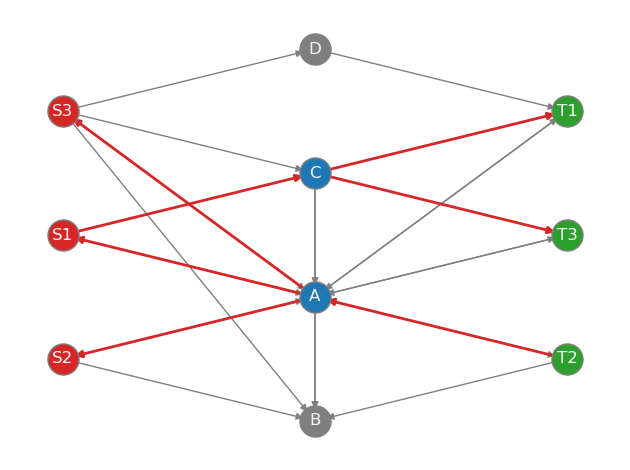

In [121]:
edges_file = Path("./input/edges2.txt")
prizes_file = Path("./input/prizes2.txt")
output_file = Path("./output/test_pathway.txt")
nodes, edges = generate_nodes_and_edges(edges_file)
print(nodes)
G = generate_graph(nodes, edges)
source_set, target_set = read_nodes(prizes_file)
print(source_set)
pr_dict, edge_list = read_data(output_file)
draw_rwr(G, edge_list, source_set, target_set)